# Popularity of States
Looking into the popularity of states for certain industries and if we can show this via a company trail

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to ensure displayed tables don't truncate columns
pd.set_option('display.max_columns', None) 

In [3]:
# using the reclassifed dataset of industries (knn added 12500~ more usable datapoints for industry)

leases = pd.read_csv('../Datasets/reconstructed_leases.csv')
# leases.head()

In [4]:
states = leases['state'].unique().tolist()

leases_2018 = leases[(leases['year'] == 2018)]
leases_2024 = leases[(leases['year'] == 2024)]

industries = leases['internal_industry'].unique().tolist()
industries

['Financial Services and Insurance',
 'Construction, Engineering and Architecture',
 'Technology, Advertising, Media, and Information',
 'Retail',
 'Manufacturing (except Pharmaceutical, Retail, and Computer Tech)',
 'Associations and Non-profit Organizations (except Education and Non-profit Hospitals)',
 'Business, Professional, and Consulting Services (except Financial and Legal) - Including Accounting',
 'Education',
 'Government',
 'Pharmaceuticals',
 'TBD',
 'Legal Services',
 'Personal Services and Recreation',
 'Real Estate (except coworking providers)',
 'Coworking and Executive Suite Companies',
 'Transportation',
 'Unclassifiable',
 'Energy & Utilities',
 'Healthcare',
 'Agriculture, Forestry, Fishing, Metal & Mineral Mining']

In [5]:
go_categories = ["New", "Relocation"]
stay_categories = ["Renewal", "Expansion", "Restructure", "Extension", "Renewal and Expansion"]

def count_entering(df):
    entering_count = 0

    for row in df.itertuples(index=False):
        if row.transaction_type in go_categories:
            entering_count += 1
    
    return entering_count

def percentage_change(old, new):
    if old == 0:
        if new > 0:
            return float('inf')
        elif new == 0:
            return 0
        else:
            return "Undefined (Negative from Zero)"
    return round(((new - old) / old) * 100)

def cap_string(s, max_length=30):
    if len(s) > max_length:
        return s[:max_length] + "..."
    return s

/tmp/ipykernel_2249/2799879788.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=data['states'], y=display_change, palette=color_map, ax=ax)
/tmp/ipykernel_2249/2799879788.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=data['states'], y=display_change, palette=color_map, ax=ax)
/tmp/ipykernel_2249/2799879788.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=data['states'], y=display_change, palette=color_map, ax=ax)
/tmp/ipykernel_2249/2799879788.py:40: FutureWarning: 

Passing `palette` without assigni

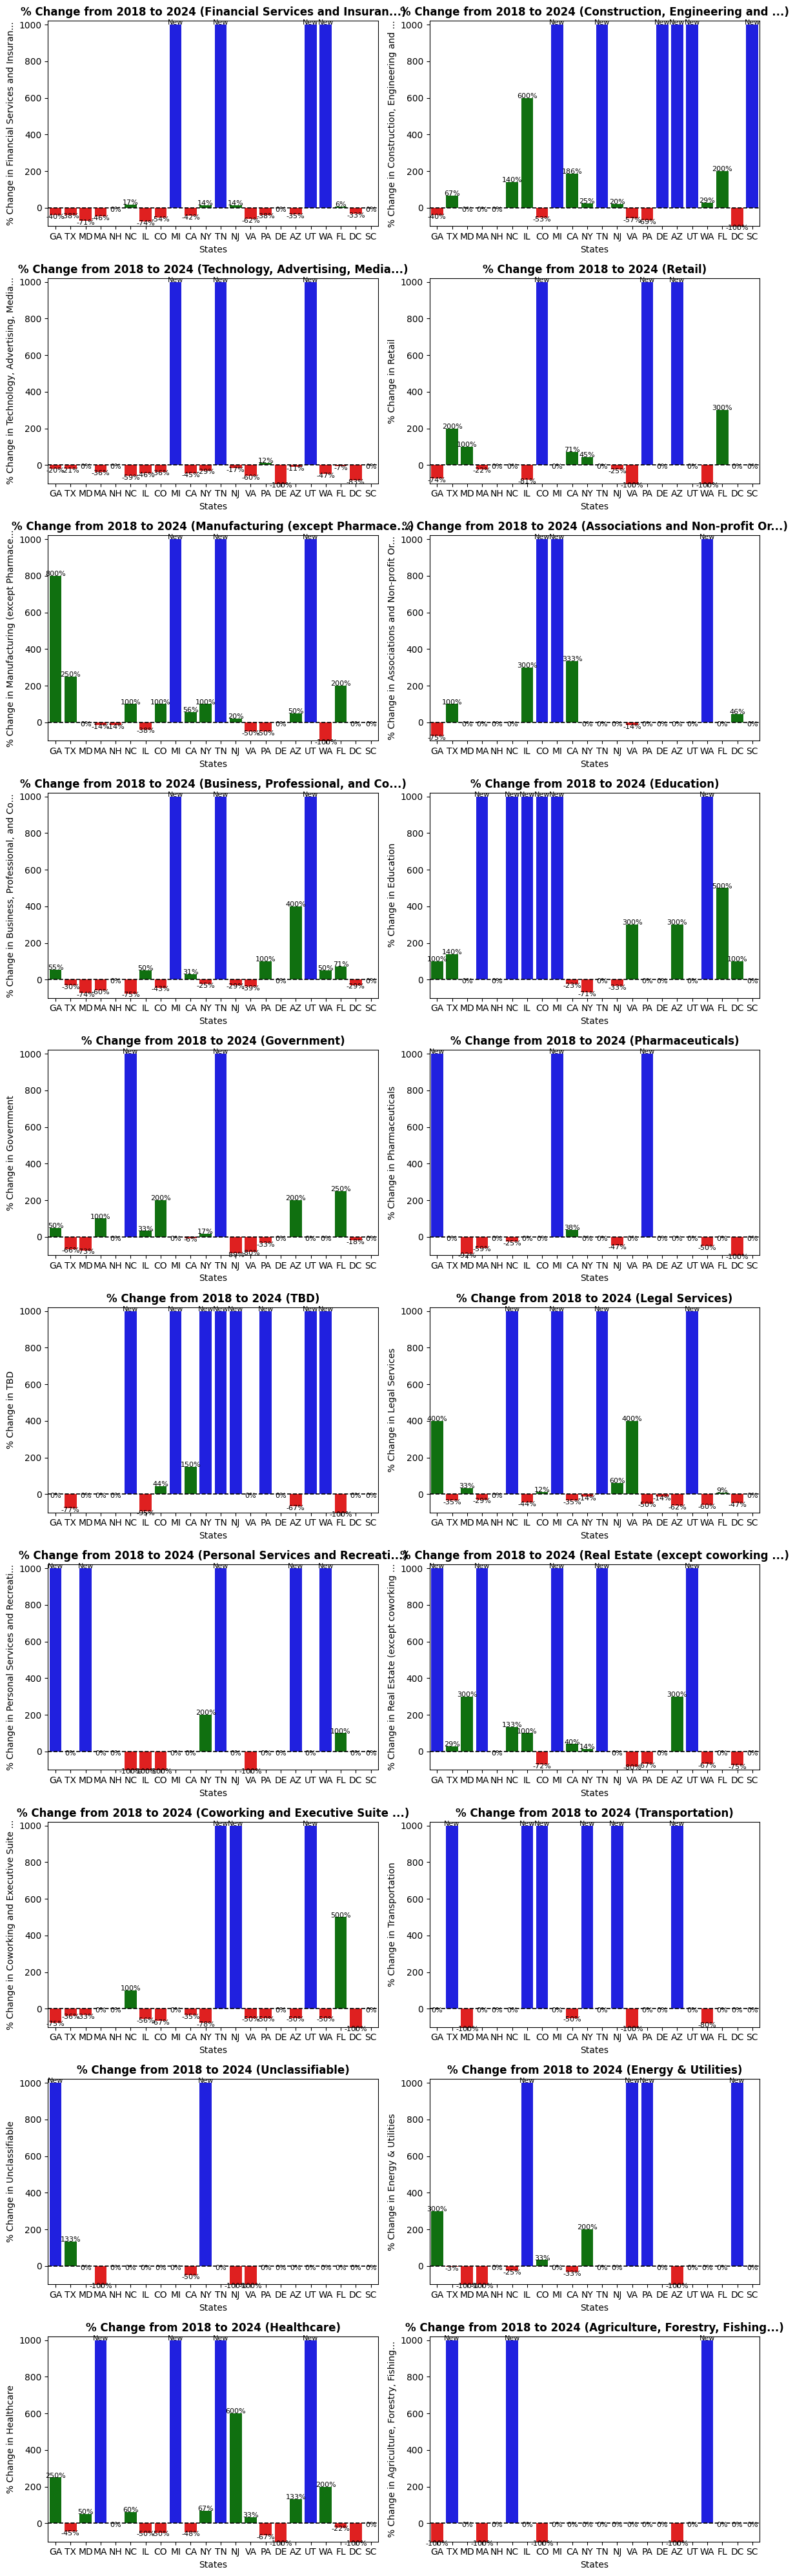

In [11]:
data = {
    'states': [],
    'change': []
}
# Assuming you already have 'industries', 'states', 'leases_2018', and 'leases_2024' defined.

# Set up the figure with 2 columns and 10 rows (20 subplots for 20 industries)
fig, axes = plt.subplots(10, 2, figsize=(12, 40))  # Adjusted size for better viewing

# Flatten the axes array to make indexing easier
axes = axes.flatten()

# Iterate through all industries and plot
for idx, industry in enumerate(industries):
    data = {'states': [], 'change': []}

    for state in states:
        industry_2018 = leases_2018[(leases_2018['internal_industry'] == industry) & (leases_2018['state'] == state)]
        industry_2024 = leases_2024[(leases_2024['internal_industry'] == industry) & (leases_2024['state'] == state)]

        count_2018 = count_entering(industry_2018)
        count_2024 = count_entering(industry_2024)

        change = percentage_change(count_2018, count_2024)

        data['states'].append(state)
        data['change'].append(change)

    # Handle infinite values by capping at 200% for visualization
    max_display_value = 1000  # You can adjust this as needed
    display_change = [min(change, max_display_value) if change != float('inf') else max_display_value for change in data['change']]

    # Define colors
    color_map = ['blue' if change == float('inf') else 'green' if change > 0 else 'red' for change in data['change']]

    # Get the current subplot axis based on the index
    ax = axes[idx]  # Flattened axis array

    # Plot for the current industry
    bars = sns.barplot(x=data['states'], y=display_change, palette=color_map, ax=ax)

    # Add a baseline at 0%
    ax.axhline(0, color='black', linewidth=1.2, linestyle='--')

    # Set Y-axis limits (-100 to 200 for better visualization)
    ax.set_ylim(-100, max_display_value + 20)

    # Add labels for each bar
    for bar, change in zip(bars.patches, data['change']):
        label = f"{change:.0f}%" if change != float('inf') else "New"
        ax.text(bar.get_x() + bar.get_width() / 2,  # X position
                bar.get_height() + 10 if change > 0 else bar.get_height() - 10,  # Adjust Y position
                label,  # Label text
                ha='center', va='center', fontsize=8, color='black')

    # Labels and title
    ax.set_ylabel(f'% Change in {cap_string(industry)}', fontsize=10)
    ax.set_xlabel('States', fontsize=10)
    ax.set_title(f'% Change from 2018 to 2024 ({cap_string(industry)})', fontsize=12, fontweight='bold')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


/tmp/ipykernel_550/1479140244.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=data['states'], y=display_change, palette=color_map, ax=ax)


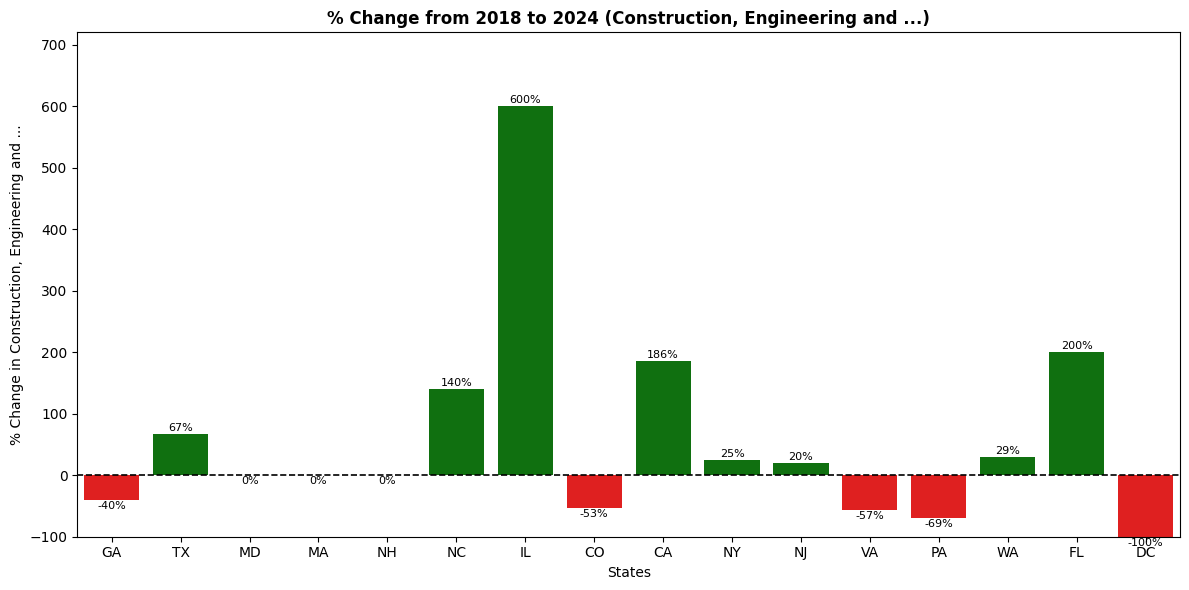

In [8]:
max_display_value = 700

industry = industries[1]

data = {'states': [], 'change': []}

# Iterate through states for the chosen industry
for state in states:
    industry_2018 = leases_2018[(leases_2018['internal_industry'] == industry) & (leases_2018['state'] == state)]
    industry_2024 = leases_2024[(leases_2024['internal_industry'] == industry) & (leases_2024['state'] == state)]

    count_2018 = count_entering(industry_2018)
    count_2024 = count_entering(industry_2024)

    change = percentage_change(count_2018, count_2024)

    if change == float('inf'):
        continue

    data['states'].append(state)
    data['change'].append(change)

# Handle infinite values by capping at 200% for visualization
max_display_value = 700  # Adjust this as needed
display_change = [min(change, max_display_value) if change != float('inf') else max_display_value for change in data['change']]

# Define colors
color_map = ['blue' if change == float('inf') else 'green' if change > 0 else 'red' for change in data['change']]

# Create a single plot instead of multiple subplots
fig, ax = plt.subplots(figsize=(12, 6))  # Adjusted size for a single plot

# Plot for the current industry
bars = sns.barplot(x=data['states'], y=display_change, palette=color_map, ax=ax)

# Add a baseline at 0%
ax.axhline(0, color='black', linewidth=1.2, linestyle='--')

# Set Y-axis limits (-100 to 200 for better visualization)
ax.set_ylim(-100, max_display_value + 20)

# Add labels for each bar
for bar, change in zip(bars.patches, data['change']):
    label = f"{change:.0f}%" if change != float('inf') else "New"
    ax.text(bar.get_x() + bar.get_width() / 2,  # X position
            bar.get_height() + 10 if change > 0 else bar.get_height() - 10,  # Adjust Y position
            label,  # Label text
            ha='center', va='center', fontsize=8, color='black')

# Labels and title
ax.set_ylabel(f'% Change in {cap_string(industry)}', fontsize=10)
ax.set_xlabel('States', fontsize=10)
ax.set_title(f'% Change from 2018 to 2024 ({cap_string(industry)})', fontsize=12, fontweight='bold')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [28]:


interesting_states = list(zip(data['change'], data['states'])) # zip state and change
interesting_states =  sorted(interesting_states, key=lambda x: x[0], reverse=True) # sort in terms of most change
interesting_states = [state for value, state in interesting_states if value > 0 and value != float('inf')] # filter only states
interesting_states = interesting_states[:4] if len(interesting_states) > 4 else interesting_states # select max 4
print(interesting_states)
# interesting_states[0] = 'IL'
dataframes = {}

for state in interesting_states:
    dataframes[state] = leases[(leases['internal_industry'] == industry) & (leases['state'] == state)]

years = leases['year'].unique().tolist()
quarters = leases['quarter'].unique().tolist()
    

['IL', 'FL', 'CA', 'NC']


/tmp/ipykernel_2249/1464594994.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(year_quarter, rotation=90)
/tmp/ipykernel_2249/1464594994.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(year_quarter, rotation=90)
/tmp/ipykernel_2249/1464594994.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(year_quarter, rotation=90)
/tmp/ipykernel_2249/1464594994.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(year_quarter, rotation=90)


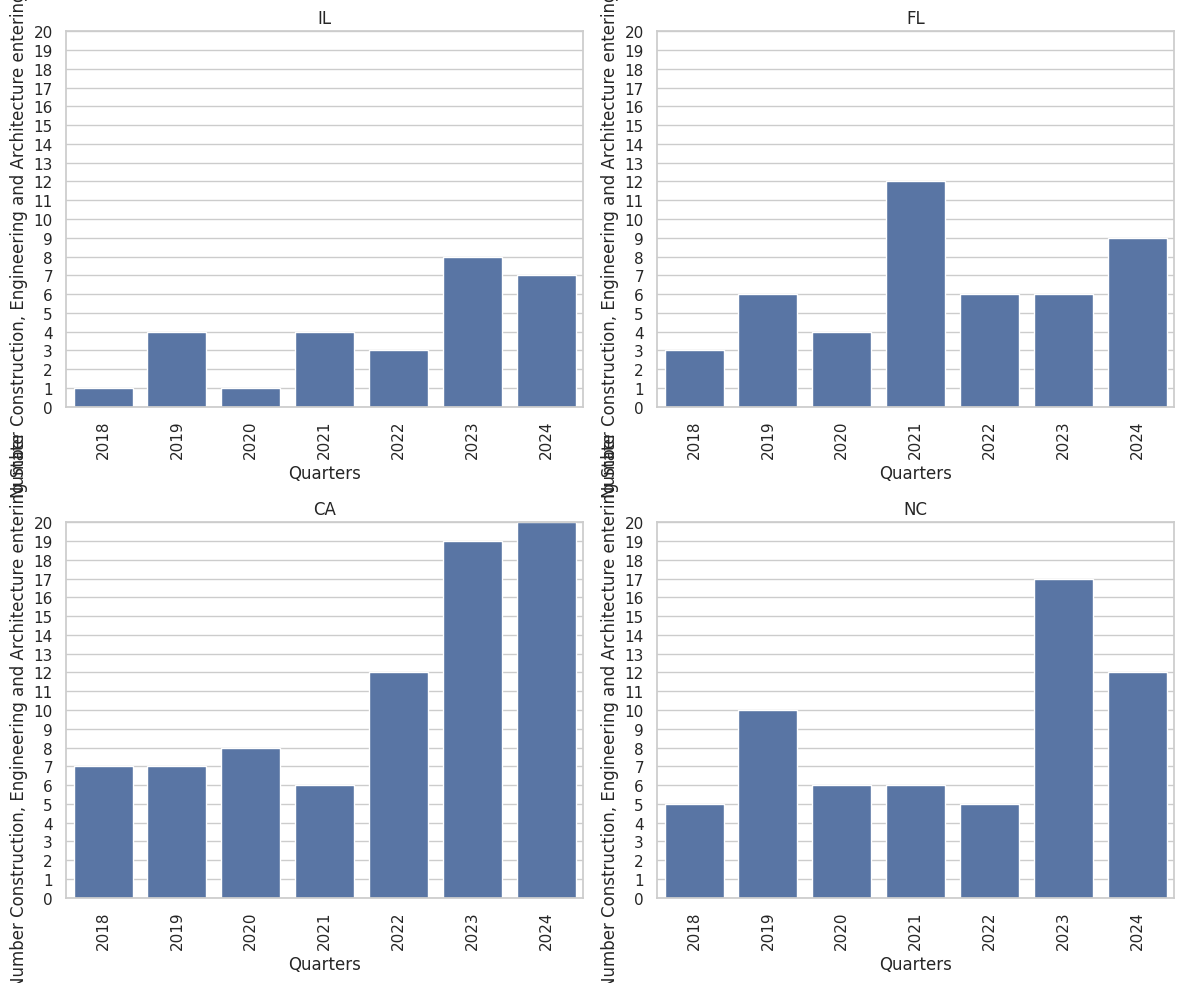

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Create a 2x2 grid
highest_count = 0

for state_code in interesting_states:
    state = dataframes[state_code]
    
    for year in years:
        df_year_quarter = state[state['year'] == year]
        count = count_entering(df_year_quarter)

        if count > highest_count:
            highest_count = count  #

for idx, state_code in enumerate(interesting_states):
    state = dataframes[state_code]
    year_quarter = []
    counted_entering = []

    for year in years:
        year_quarter.append(f'{year}')
        df_year_quarter = state[(state['year'] == year)]
        count = count_entering(df_year_quarter)
        counted_entering.append(count)

    # Determine subplot location
    ax = axes[idx // 2, idx % 2]  # Convert index to 2D position
    
    sns.set_theme(style="whitegrid")
    sns.barplot(x=year_quarter, y=counted_entering, ax=ax)
    ax.set_xticklabels(year_quarter, rotation=90)
    ax.set_yticks(np.arange(0, highest_count + 1, 1))  # Set uniform y-ticks
    ax.set_ylim(0, highest_count)
    
    ax.set_xlabel("Quarters")
    ax.set_ylabel(f"Number {industry} entering State")
    ax.set_title(f"{state_code}")  # Title is the state code

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

/tmp/ipykernel_626/2311363115.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(year_quarter, rotation=90)
/tmp/ipykernel_626/2311363115.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(year_quarter, rotation=90)
/tmp/ipykernel_626/2311363115.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(year_quarter, rotation=90)
/tmp/ipykernel_626/2311363115.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(year_quarter, rotation=90)


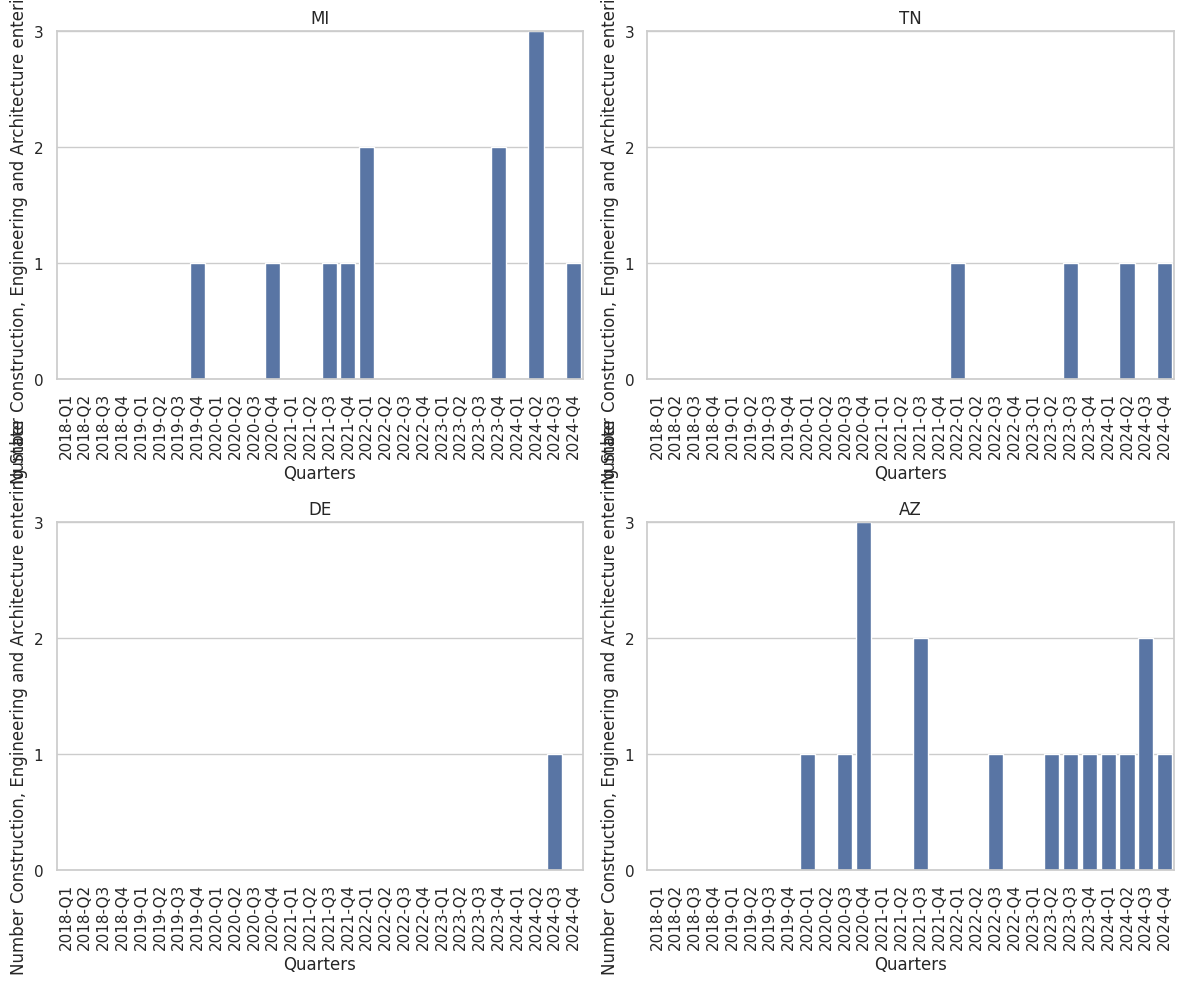

In [169]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Create a 2x2 grid
highest_count = 0

for state_code in interesting_states:
    state = dataframes[state_code]
    
    for year in years:
        for quarter in quarters:
            df_year_quarter = state[(state['year'] == year) & (state['quarter'] == quarter)]
            count = count_entering(df_year_quarter)

            if count > highest_count:
                highest_count = count  #

for idx, state_code in enumerate(interesting_states):
    state = dataframes[state_code]
    year_quarter = []
    counted_entering = []

    for year in years:
        for quarter in quarters:
            year_quarter.append(f'{year}-{quarter}')
            df_year_quarter = state[(state['year'] == year) & (state['quarter'] == quarter)]
            count = count_entering(df_year_quarter)
            counted_entering.append(count)

    # Determine subplot location
    ax = axes[idx // 2, idx % 2]  # Convert index to 2D position
    
    sns.set_theme(style="whitegrid")
    sns.barplot(x=year_quarter, y=counted_entering, ax=ax)
    ax.set_xticklabels(year_quarter, rotation=90)
    ax.set_yticks(np.arange(0, highest_count + 1, 1))  # Set uniform y-ticks
    ax.set_ylim(0, highest_count)
    
    ax.set_xlabel("Quarters")
    ax.set_ylabel(f"Number {industry} entering State")
    ax.set_title(f"{state_code}")  # Title is the state code

plt.tight_layout()  # Adjust layout for better spacing
plt.show()